# Lab 4

## Yanruyu Zhu (yaz4004)
### Github Repo:  https://github.com/ZhuYRY/5018_DataScience.git

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter

# Q1
## a) Read in the file 'listings'

In [23]:
# Read in the file 'listings'
listings = pd.read_csv("listings.csv")
# Take a look at the first 5 rows
listings.head()

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,3781,https://www.airbnb.com/rooms/3781,20190714024644,2019-07-14,HARBORSIDE-Walk to subway,Fully separate apartment in a two apartment bu...,This is a totally separate apartment located o...,Fully separate apartment in a two apartment bu...,none,"Mostly quiet ( no loud music, no crowed sidewa...",...,f,f,super_strict_30,f,f,1,1,0,0,0.31
1,5506,https://www.airbnb.com/rooms/5506,20190714024644,2019-07-14,**$99 Special ** Private! Minutes to center!,This is a private guest room with private bath...,**THE BEST Value in BOSTON!!*** PRIVATE GUEST ...,This is a private guest room with private bath...,none,"Peacful, Architecturally interesting, historic...",...,t,f,strict_14_with_grace_period,f,f,6,6,0,0,0.76
2,6695,https://www.airbnb.com/rooms/6695,20190714024644,2019-07-14,$99 Special!! Home Away! Condo,NaN,** WELCOME *** FULL PRIVATE APARTMENT In a His...,** WELCOME *** FULL PRIVATE APARTMENT In a His...,none,"Peaceful, Architecturally interesting, histori...",...,t,f,strict_14_with_grace_period,f,f,6,6,0,0,0.84
3,6976,https://www.airbnb.com/rooms/6976,20190714024644,2019-07-14,Mexican Folk Art Showcase in Boston Neighborhood,Come stay with me in Boston's Roslindale neigh...,"This is a well-maintained, two-family house bu...",Come stay with me in Boston's Roslindale neigh...,none,The LOCATION: Roslindale is a safe and diverse...,...,f,f,moderate,t,f,1,0,1,0,0.66
4,8789,https://www.airbnb.com/rooms/8789,20190714024644,2019-07-14,Curved Glass Studio/1bd facing Park,"Bright, 1 bed with curved glass windows facing...",Fully Furnished studio with enclosed bedroom. ...,"Bright, 1 bed with curved glass windows facing...",none,Beacon Hill is a historic neighborhood filled ...,...,f,f,strict_14_with_grace_period,f,f,10,10,0,0,0.38


## b) How many entries are in the file?

In [3]:
# How many entries are in the file?
print("There are {0} entries in the file.".format(listings.shape[0]))


There are 6264 entries in the file.


## c) How many unique identifiers are there for AirBnB listings?

In [4]:
print("There are {0} unique ID for Airbnb listings.".format(listings.nunique(axis = 0)[0]) )

There are 6264 unique ID for Airbnb listings.


# Question 2      
## a) Read in the 'reviews' file that contains the date of reviews for the Boston AirBnB listings.

In [24]:
# Read in the 'reviews' file
reviews = pd.read_csv("reviews.csv")
# Take a look at the first 5 rows
reviews.head()

,listing_id,date
0,3781,2015-07-10
1,3781,2015-08-09
2,3781,2015-09-01
3,3781,2015-09-30
4,3781,2015-10-30


## b) How many entries are in the file?

In [6]:
print("There are {0} entries in the file.".format(reviews.shape[0]))

There are 225880 entries in the file.


## c) How many unique identifiers are there for AirBnB listings?

In [7]:
print("There are {0} unique identifiers for AirBnB listings.".format(reviews.nunique(axis=0)[0]))

There are 5088 unique identifiers for AirBnB listings.


## d) Do all of the listings have a corresponding review?

In [8]:
listings.nunique(axis = 0)[0] - reviews.nunique(axis=0)[0]

1176

### Since the number of unique IDs in "listings" is 1176 smaller than the number of unique IDs in "reviews", there are 1176 listings which do not have a corresponding review.


# Question 3
## a) Merge the review and listing files.

In [25]:
# In order that all of the entries from listing are in the merged data frame 
# and have an NaN if there is no corresponding entry in reviews.
# Use an "outer" join on matching
# "Review" by "listing_id"; "Listings" by "id"
merge_data_3 = pd.merge(reviews, listings, how = "outer", left_on = "listing_id", right_on = "id")

## b) How many rows do you now have?

In [10]:
print("There are {0} rows.".format(merge_data_3.shape[0]))

There are 227056 rows.


## c) How many unique AirBnB ids do you have?

In [11]:
print("There are {0} unique AirBnB IDs.".format(merge_data_3.nunique(axis = 0)[2]))

There are 6264 unique AirBnB IDs.


## d) How many rows were filled in with NaN?

In [12]:
print("There are {0} rows were filled in with NaN.".format(merge_data_3["listing_id"].isna().sum()))

There are 1176 rows were filled in with NaN.


# Question 4 
## a) Merge the review and listing files again using 'pd.merge' so that all of the entries from reviews are in the dataframe (and therefore any entries from listings that do not have a review are dropped)

In [26]:
# Use "Inner" join 
merge_data_4 = pd.merge(reviews, listings, how = "inner", left_on = "listing_id", right_on = "id")

## b) How many rows do you now have?

In [14]:
print("There are {0} rows.".format(merge_data_4.shape[0]))

There are 225880 rows.


## c) How many unique AirBnB ids do you have?

In [15]:
print("There are {0} unique AirBnB IDs.".format(merge_data_4.nunique(axis = 0)[2]))

There are 5088 unique AirBnB IDs.


# Question 5 
## a) How many unique AirBnBs are hosted by a 'superhost' in Boston?

In [27]:
n_airbnb = listings[listings["host_is_superhost"].isin(["t"])].nunique()[0]
print("There are {0} unique AirBnBs which are hosted by a 'superhost' in Boston".format(n_airbnb))

There are 1448 unique AirBnBs which are hosted by a 'superhost' in Boston


## b) How many superhosts are there in Boston?

In [28]:
# Filter out listings which are hosted by a "superhost" from "listings"
air_super = listings[listings["host_is_superhost"].isin(["t"])]
# Count the unique "host id"
n_host = air_super['host_id'].nunique()
print("There are {0} super hosts in Boston.".format(n_host))

There are 757 super hosts in Boston.


## c) How many super hosts do not have any reviews in the 'reviews' dataset?

In [29]:
# Filter out listings which are hosted by a "superhost" from an outer-merged dataset
super_host = merge_data_3[merge_data_3["host_is_superhost"].isin(["t"])]
# Filter out listings which do not have matched "listing_id"
no_review = super_host[super_host['listing_id'].isnull()]
# Count the unique "host_id"
unique_no_review = no_review['host_id'].nunique()

print("There are {0} super hosts do not have any reviews.".format(unique_no_review))

There are 35 super hosts do not have any reviews.


## d) What is the median number of reviews that a superhost has in the 'reviews' dataset?

In [30]:
# Filter out listings which are hosted by a "superhost" from an inner-merged dataset
super_host = merge_data_4[merge_data_4["host_is_superhost"].isin(["t"])]
# filter out super host in the review data set
super_host_re = super_host[super_host['date'].notnull()]
# Count the number of reviews for each super_host
temp = np.median(list(Counter(super_host_re['host_id']).values()))

# Take the median for each superhost
print("The median number of reviews that a superhost has in the 'reviews' dataset is {0}.".format(np.median(temp)))

The median number of reviews that a superhost has in the 'reviews' dataset is 72.0.


# Question 6 
## Make boxplots to compare the number of reviews of superhosts to non-superhosts.

Text(0, 0.5, 'log value of number of reviews')

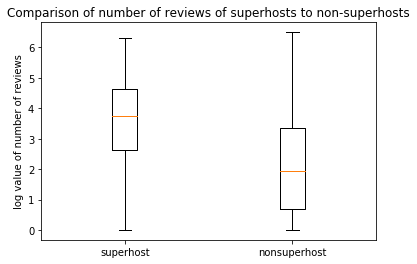

In [32]:
superhost = listings[listings["host_is_superhost"].isin(["t"])]
nonsuperhost = listings[listings["host_is_superhost"].isin(["f"])]
# Add 1 to the number of reviews
# to calculate log(reviews)
num_re_super = np.log(superhost['number_of_reviews']+1)
num_re_nonsuper = np.log(nonsuperhost['number_of_reviews']+1)

# plot boxplot
fig,axe = plt.subplots()
plt.boxplot([num_re_super,num_re_nonsuper])
plt.title("Comparison of number of reviews of superhosts to non-superhosts")
axe.set_xticklabels(['superhost','nonsuperhost'])
plt.ylabel("log value of number of reviews")